In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import sklearn as sk

In [3]:
data_path = "./data/Bike_rental_modified.csv"
header = [
    "instant", 
    "dteday",#nominal
    "season",#nominal
    "yr",#nominal
    "mnth",#nominal
    "holiday", #ordinal
    "weekday",#ordinal
    "workingday",#ordinal
    "weathersit",#ordinal
    "temp", #metrisch
    "atemp",#metrisch
    "hum",#metrisch
    "windspeed",#metrisch
    "casual",#metrisch
    "registered",#metrisch
    "cnt",#metrisch
    "intday"
]
bike_rental = pd.read_csv(data_path)

In [7]:
nominal = ['dteday', 'season', 'yr', 'mnth']
ordinal = ['holiday', 'weekday', 'workingday', 'weathersit']
metric = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


print("\nMetrische Daten - Statistische Kennzahlen:")
print(bike_rental[metric].describe())



Metrische Daten - Statistische Kennzahlen:
             temp       atemp         hum   windspeed       casual  \
count  547.000000  547.000000  547.000000  547.000000   547.000000   
mean    19.678560   23.058176   62.381606   13.147573   772.477148   
std      7.440897    8.103395   15.050586    5.190572   671.200178   
min      2.424346    3.953480    0.000000    1.500244     9.000000   
25%     13.346525   16.224050   50.630700    9.396047   246.000000   
50%     19.372500   23.201050   62.208300   12.625011   653.000000   
75%     26.035000   29.735300   73.645800   15.916855  1004.500000   
max     34.815847   42.044800   97.250000   34.000021  3410.000000   

        registered          cnt  
count   547.000000   547.000000  
mean   3214.319927  3986.797075  
std    1320.182400  1711.647250  
min     416.000000   431.000000  
25%    2229.500000  2696.000000  
50%    3312.000000  4098.000000  
75%    4022.500000  4990.500000  
max    6456.000000  8362.000000  


2) Grafische Darstellung cnt casual registered

Text(0, 0.5, 'cnt')

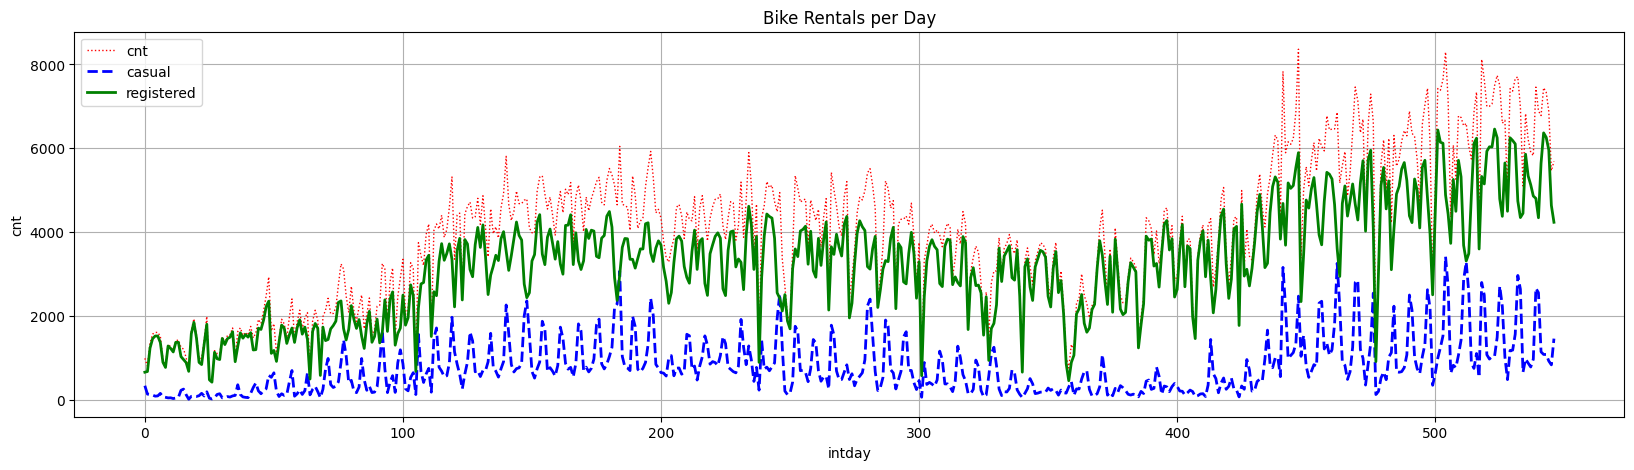

In [25]:
fig,ax = plt.subplots(figsize=(20, 5))
ax.plot(bike_rental['intday'], bike_rental["cnt"], label = "cnt",color = "red", linestyle = ":",linewidth=1)
ax.plot(bike_rental['intday'], bike_rental["casual"], label = "casual",color = "blue", linestyle = "--", linewidth=2)
ax.plot(bike_rental['intday'], bike_rental["registered"], label = "registered",color = "green", linestyle = "solid", linewidth=2) 
ax.set_title('Bike Rentals per Day')    
ax.grid(True) 
ax.legend() 
ax.set_xlabel('intday') 
ax.set_ylabel('cnt') 

Bei den casual Daten sind regelmäßige Spikes erkennbar, besonders außerhalb der Wintermonate, es handelt scih hier vermutlich um Anstiege zu den Wochenenden. 
Im Gegensatz dazu sind die Reservierungen zu Wochenenden eher geringer.
Im Gesamten lässt sich ein Ansteig erkennen, gut erkennbar über einen jahr zu Jahr Vergleich. 

3) Abhängigkeit der verschiedenen Histogramme und Scatter-Plots von Wetter

Grün => gutes Wetter, klarer Himmel bis leicht bewölkt 
Gelb => bewölkt, nebelig
Rot => Niederschlag, Gewitter
Schwarz => schwerer Niederschlag 


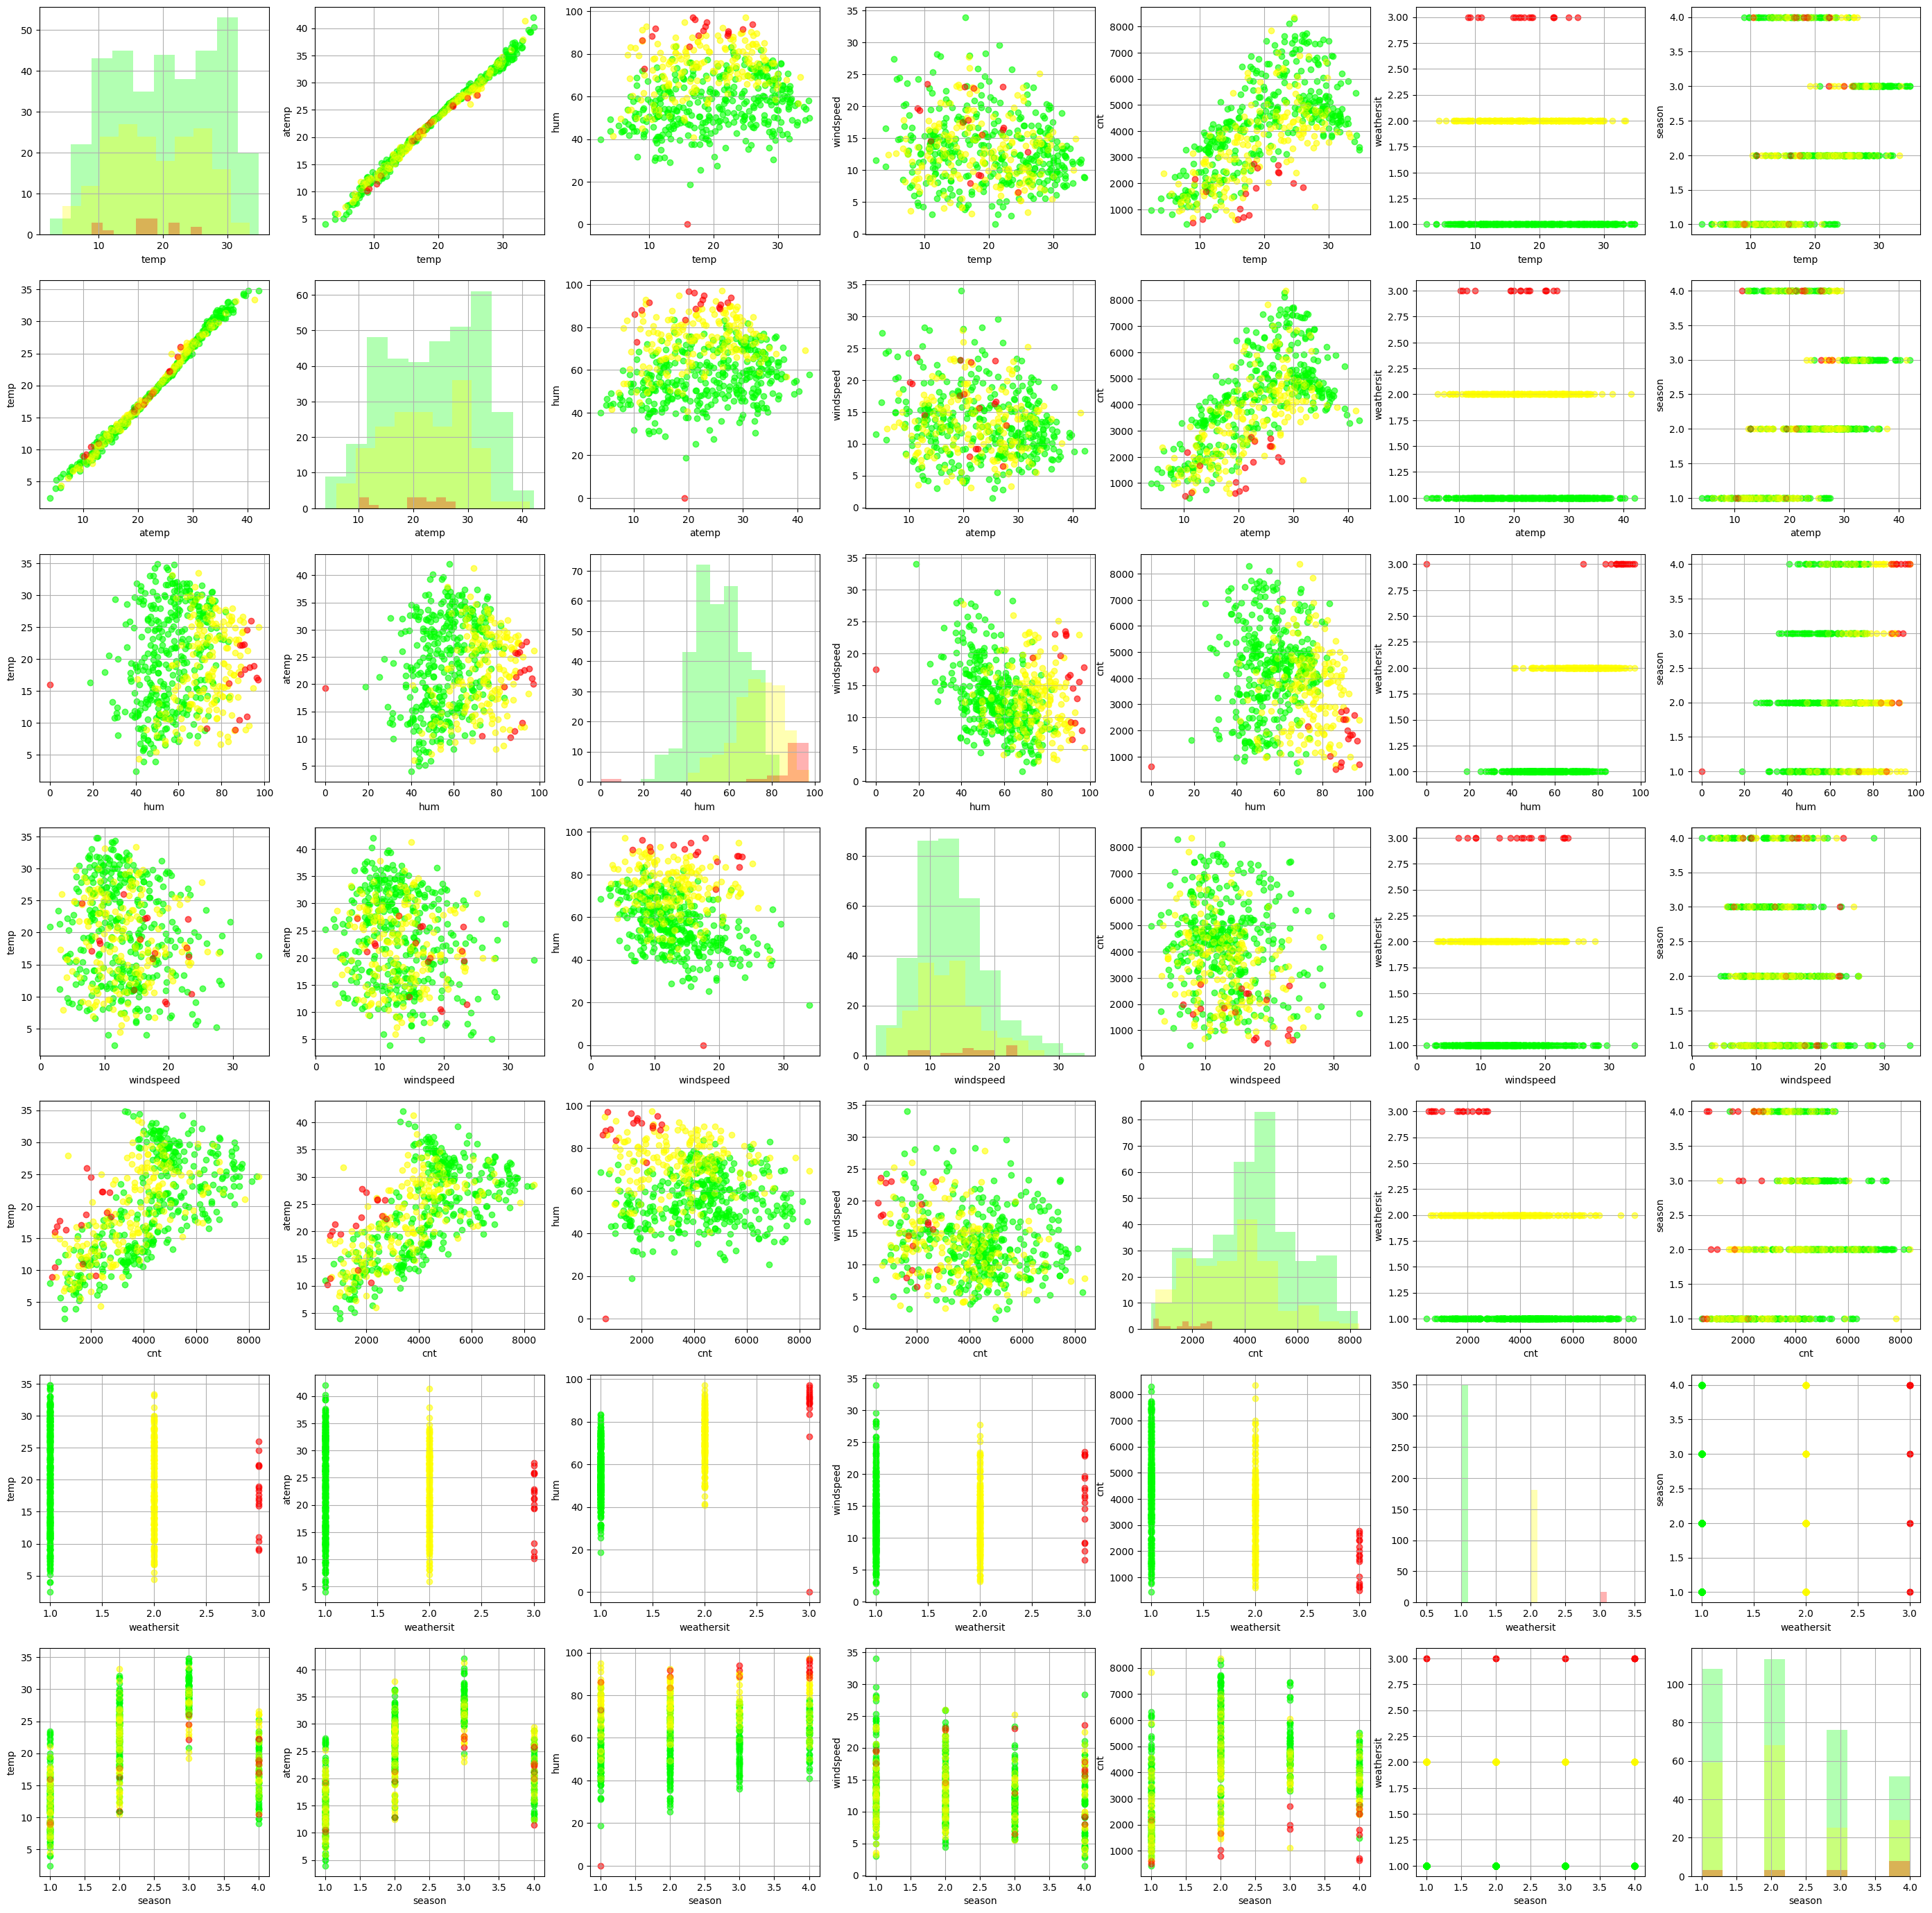

In [23]:
# no_show_columns=  ['instant','dteday','intday','season','yr','mnth','holiday','weekday','workingday',"weathersit", "casual", "registered"] # Welche Spalten nicht angezeigt werden sollen
# n=len(bike_rental.columns)-len(no_show_columns) # Anzahl der zu zeigenden Zellen
# show_columns=list(bike_rental.columns) # Bilde liste mit allen Colomns
# for column in no_show_columns:
#     show_columns.remove(column) # Wie oben

show_columns=['temp', 'atemp', 'hum', 'windspeed', 'cnt',"weathersit","season"] # Welche Spalten angezeigt werden sollen
    
spec_feat='weathersit' # Features nach welchem ich Farblich unterscheiden soll
specials=np.sort(np.unique(bike_rental[spec_feat].values)) # Mache  Liste der verschiedenen Einträge von specials
color_dict={1:'lime', 
           2:'yellow',
           3:'red',
           4:'black'}

n = len(show_columns)

fig,ax=plt.subplots(n,n,figsize=(35,35))
for i,key in  enumerate(show_columns):
    for j,key2 in enumerate(show_columns):
        if key==key2: # Auf Diagonale
            for spec in specials: # iteriere durch die Werte von Specials 
                cond=(bike_rental[spec_feat]==spec) #erzeuge einen bool'schen Vektor der  True oder False entält, 
                #ob das entsprechende Element in den Daten mit dem iterationselement spec übereinstimmt
                # Mit diesem Vektor [cond] kann dann mit .loc[cond] gefiltert werden, dass er nur die True-Elemente behält
                ax[i][i].hist(bike_rental[key].loc[cond],color=color_dict[spec],alpha=0.3,label=key) # Plotte immer
                #nur die Elemente die True in cond als Wert haben, codiere mit Farbe
                # Verwende als Farbwert den Eintrag im Dictionary color_dict, Verwende als Label denn key und die Season. Joine beide Strings mit einem _ dazwischen
            ax[i][i].set_xlabel(key)
        else: # Off-Diagonale wie oben
            for spec in specials:
                cond=(bike_rental[spec_feat]==spec)
                ax[i][j].scatter(bike_rental[key].loc[cond], bike_rental[key2].loc[cond], alpha=0.5, color=color_dict[spec])
                ax[i][j].plot(bike_rental[key].loc[cond],bike_rental[key2].loc[cond],ls='',marker='o',alpha=0.2,color=color_dict[spec])
            ax[i][j].set_xlabel(key)
            ax[i][j].set_ylabel(key2)
        ax[i][j].grid(True)

3) Erzeugen neuer Features 

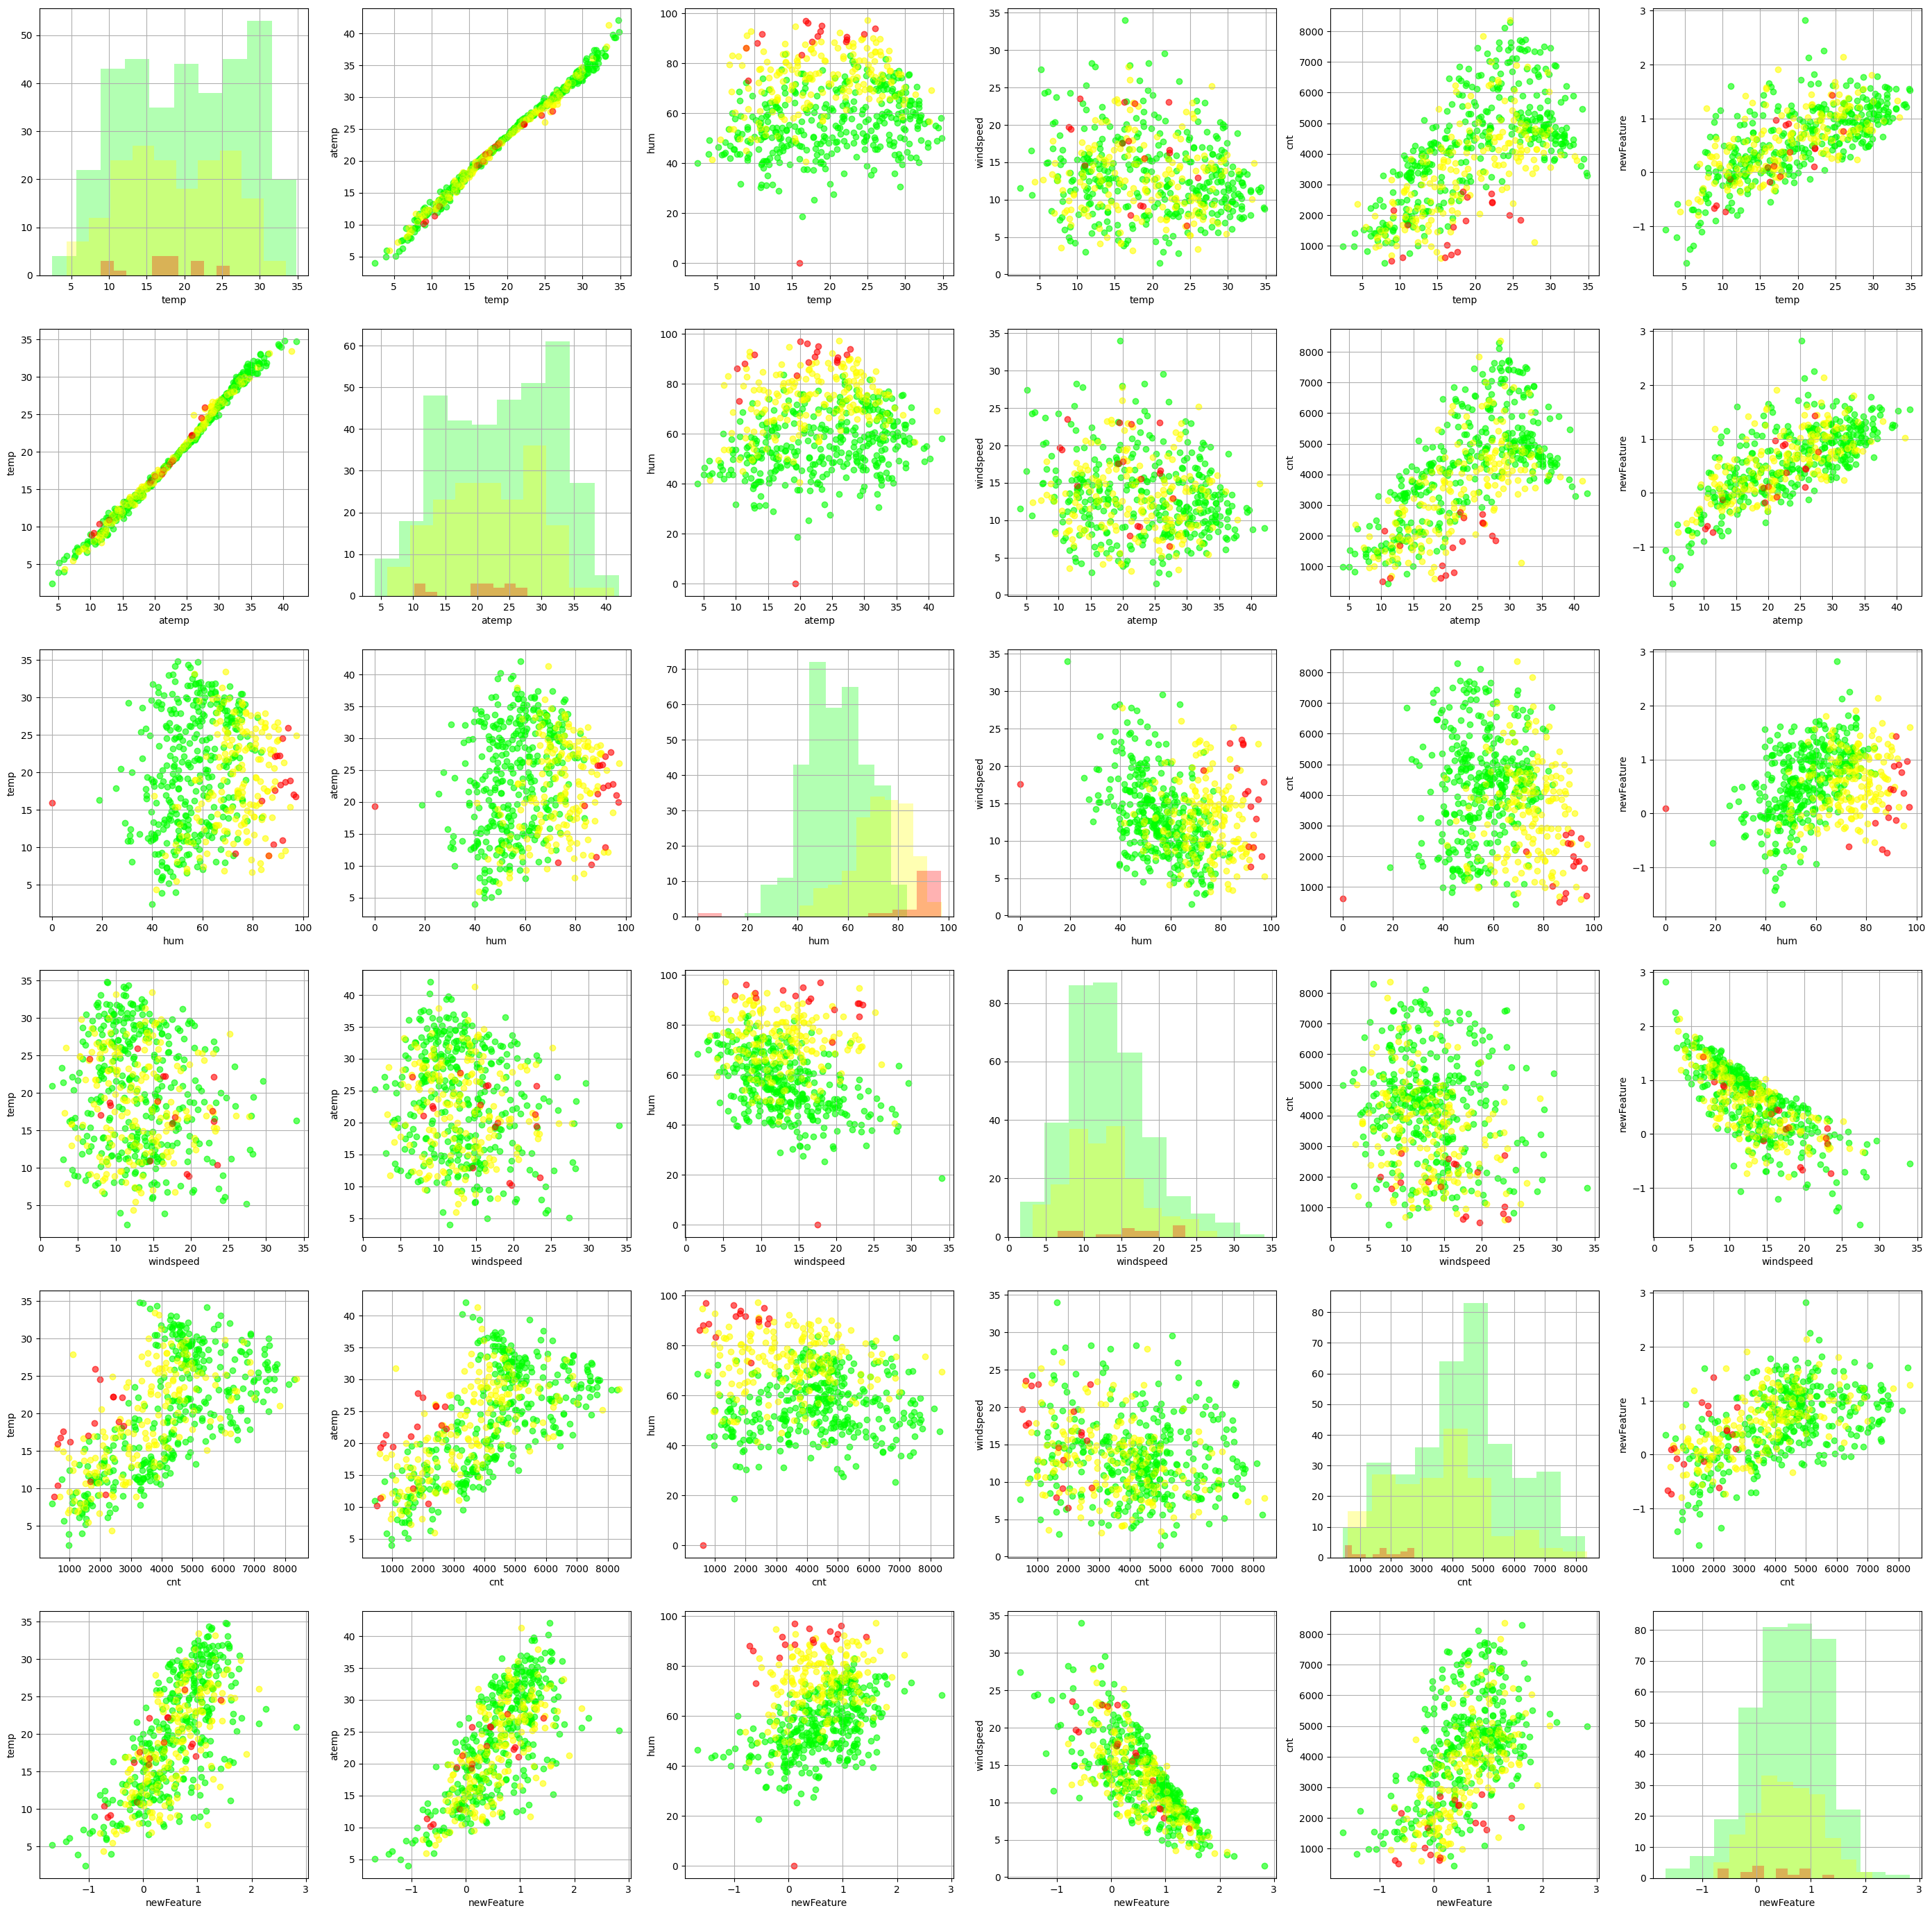

In [64]:
from numpy import log


bike_rental["newFeature"] =  log(bike_rental["atemp"] /(bike_rental["windspeed"])) # Erstelle neue Feature

show_columns=['temp', 'atemp', 'hum', 'windspeed', 'cnt',"newFeature"] # Welche Spalten angezeigt werden sollen
    
spec_feat='weathersit' # Features nach welchem ich Farblich unterscheiden soll
specials=np.sort(np.unique(bike_rental[spec_feat].values)) # Mache  Liste der verschiedenen Einträge von specials
color_dict={1:'lime', 
           2:'yellow',
           3:'red',
           4:'black'}

n = len(show_columns)

fig,ax=plt.subplots(n,n,figsize=(35,35))
for i,key in  enumerate(show_columns):
    for j,key2 in enumerate(show_columns):
        if key==key2: # Auf Diagonale
            for spec in specials: # iteriere durch die Werte von Specials 
                cond=(bike_rental[spec_feat]==spec) #erzeuge einen bool'schen Vektor der  True oder False entält, 
                #ob das entsprechende Element in den Daten mit dem iterationselement spec übereinstimmt
                # Mit diesem Vektor [cond] kann dann mit .loc[cond] gefiltert werden, dass er nur die True-Elemente behält
                ax[i][i].hist(bike_rental[key].loc[cond],color=color_dict[spec],alpha=0.3,label=key) # Plotte immer
                #nur die Elemente die True in cond als Wert haben, codiere mit Farbe
                # Verwende als Farbwert den Eintrag im Dictionary color_dict, Verwende als Label denn key und die Season. Joine beide Strings mit einem _ dazwischen
            ax[i][i].set_xlabel(key)
        else: # Off-Diagonale wie oben
            for spec in specials:
                cond=(bike_rental[spec_feat]==spec)
                ax[i][j].scatter(bike_rental[key].loc[cond], bike_rental[key2].loc[cond], alpha=0.5, color=color_dict[spec])
                ax[i][j].plot(bike_rental[key].loc[cond],bike_rental[key2].loc[cond],ls='',marker='o',alpha=0.2,color=color_dict[spec])
            ax[i][j].set_xlabel(key)
            ax[i][j].set_ylabel(key2)
        ax[i][j].grid(True)

In [65]:

corr = bike_rental.drop(columns=["dteday"]).corr()  # Compute pairwise correlations for numeric columns
display(corr)

Unnamed: 0   instant    season        yr      mnth   holiday  \
Unnamed: 0    1.000000  1.000000  0.119745  0.816124  0.167121  0.005884   
instant       1.000000  1.000000  0.119745  0.816124  0.167121  0.005884   
season        0.119745  0.119745  1.000000 -0.395049  0.861008 -0.011384   
yr            0.816124  0.816124 -0.395049  1.000000 -0.431140  0.000217   
mnth          0.167121  0.167121  0.861008 -0.431140  1.000000  0.007488   
holiday       0.005884  0.005884 -0.011384  0.000217  0.007488  1.000000   
weekday       0.007893  0.007893  0.002934 -0.001934  0.015859 -0.106685   
workingday    0.002793  0.002793  0.008288  0.001910  0.001550 -0.247937   
weathersit   -0.067792 -0.067792  0.037905 -0.074542  0.023561 -0.038700   
temp          0.179691  0.179691  0.425481 -0.052329  0.366798 -0.026580   
atemp         0.187083  0.187083  0.429785 -0.049606  0.374262 -0.034858   
hum          -0.042478 -0.042478  0.237823 -0.186933  0.248996 -0.040535   
windspeed    -0.045661 -0.045661 -0.214274  0.088368 -0.223746  0.035486   
casual        0.300449  0.300449  0.182944  0.200780  0.128759  0.048058   
registered    0.670961  0.670961  0.223179  0.521766  0.159856 -0.109211   
cnt           0.635325  0.635325  0.243876  0.481168  0.173787 -0.065389   
intday        1.000000  1.000000  0.119745  0.816124  0.167121  0.005884   
newFeature    0.181668  0.181668  0.452915 -0.086967  0.433313 -0.041092   

             weekday  workingday  weathersit      temp     atemp       hum  \
Unnamed: 0  0.007893    0.002793   -0.067792  0.179691  0.187083 -0.042478   
instant     0.007893    0.002793   -0.067792  0.179691  0.187083 -0.042478   
season      0.002934    0.008288    0.037905  0.425481  0.429785  0.237823   
yr         -0.001934    0.001910   -0.074542 -0.052329 -0.049606 -0.186933   
mnth        0.015859    0.001550    0.023561  0.366798  0.374262  0.248996   
holiday    -0.106685   -0.247937   -0.038700 -0.026580 -0.034858 -0.040535   
weekday     1.000000    0.033319    0.037996 -0.001849 -0.002763 -0.037126   
workingday  0.033319    1.000000    0.076147  0.053243  0.058432  0.038771   
weathersit  0.037996    0.076147    1.000000 -0.104511 -0.105930  0.588860   
temp       -0.001849    0.053243   -0.104511  1.000000  0.996443  0.145697   
atemp      -0.002763    0.058432   -0.105930  0.996443  1.000000  0.156928   
hum        -0.037126    0.038771    0.588860  0.145697  0.156928  1.000000   
windspeed  -0.001471    0.001031    0.024479 -0.133521 -0.157285 -0.271614   
casual      0.034392   -0.512765   -0.255751  0.535019  0.536820 -0.083615   
registered  0.051738    0.306405   -0.281040  0.567828  0.576388 -0.127011   
cnt         0.053392    0.035254   -0.317054  0.647763  0.655071 -0.130751   
intday      0.007893    0.002793   -0.067792  0.179691  0.187083 -0.042478   
newFeature -0.002736    0.045905   -0.063407  0.691153  0.715137  0.311885   

            windspeed    casual  registered       cnt    intday  newFeature  
Unnamed: 0  -0.045661  0.300449    0.670961  0.635325  1.000000    0.181668  
instant     -0.045661  0.300449    0.670961  0.635325  1.000000    0.181668  
season      -0.214274  0.182944    0.223179  0.243876  0.119745    0.452915  
yr           0.088368  0.200780    0.521766  0.481168  0.816124   -0.086967  
mnth        -0.223746  0.128759    0.159856  0.173787  0.167121    0.433313  
holiday      0.035486  0.048058   -0.109211 -0.065389  0.005884   -0.041092  
weekday     -0.001471  0.034392    0.051738  0.053392  0.007893   -0.002736  
workingday   0.001031 -0.512765    0.306405  0.035254  0.002793    0.045905  
weathersit   0.024479 -0.255751   -0.281040 -0.317054 -0.067792   -0.063407  
temp        -0.133521  0.535019    0.567828  0.647763  0.179691    0.691153  
atemp       -0.157285  0.536820    0.576388  0.655071  0.187083    0.715137  
hum         -0.271614 -0.083615   -0.127011 -0.130751 -0.042478    0.311885  
windspeed    1.000000 -0.157635   -0.143408 -0.172424 -0.045661   -0.7

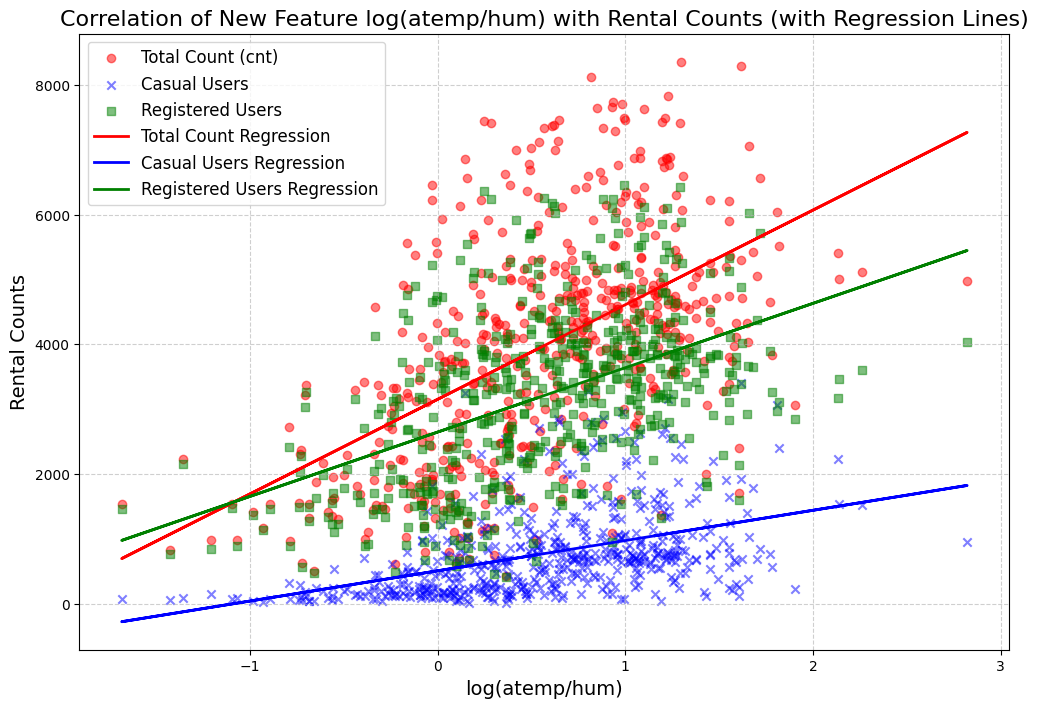

In [75]:

# plot korrelation of new Feature with rental count, registered and casual
import numpy as np

fig, ax = plt.subplots(figsize=(12, 8))  # Slightly larger figure for better visibility

# Scatter plots
ax.scatter(bike_rental['newFeature'], bike_rental["cnt"], label="Total Count (cnt)", color="red", alpha=0.5)
ax.scatter(bike_rental['newFeature'], bike_rental["casual"], label="Casual Users", color="blue", alpha=0.5, marker= "x")
ax.scatter(bike_rental['newFeature'], bike_rental["registered"], label="Registered Users", color="green", alpha=0.5, marker= "s")

# Add regression lines
for column, color, label in zip(["cnt", "casual", "registered"], ["red", "blue", "green"], ["Total Count", "Casual Users", "Registered Users"]):
    # Fit a linear regression model
    coeffs = np.polyfit(bike_rental['newFeature'], bike_rental[column], 1)  # Linear regression (degree=1)
    regression_line = np.poly1d(coeffs)  # Generate the regression line
    ax.plot(bike_rental['newFeature'], regression_line(bike_rental['newFeature']), color=color, linestyle="solid", label=f"{label} Regression", linewidth=2)

# Add title and axis labels
ax.set_title("Correlation of New Feature log(atemp/hum) with Rental Counts (with Regression Lines)", fontsize=16)
ax.set_xlabel("log(atemp/hum)", fontsize=14)
ax.set_ylabel("Rental Counts", fontsize=14)

# Add grid for better readability
ax.grid(True, linestyle="--", alpha=0.6)

# Add legend with improved placement
ax.legend(loc="upper left", fontsize=12)

# Show the plot
plt.show()


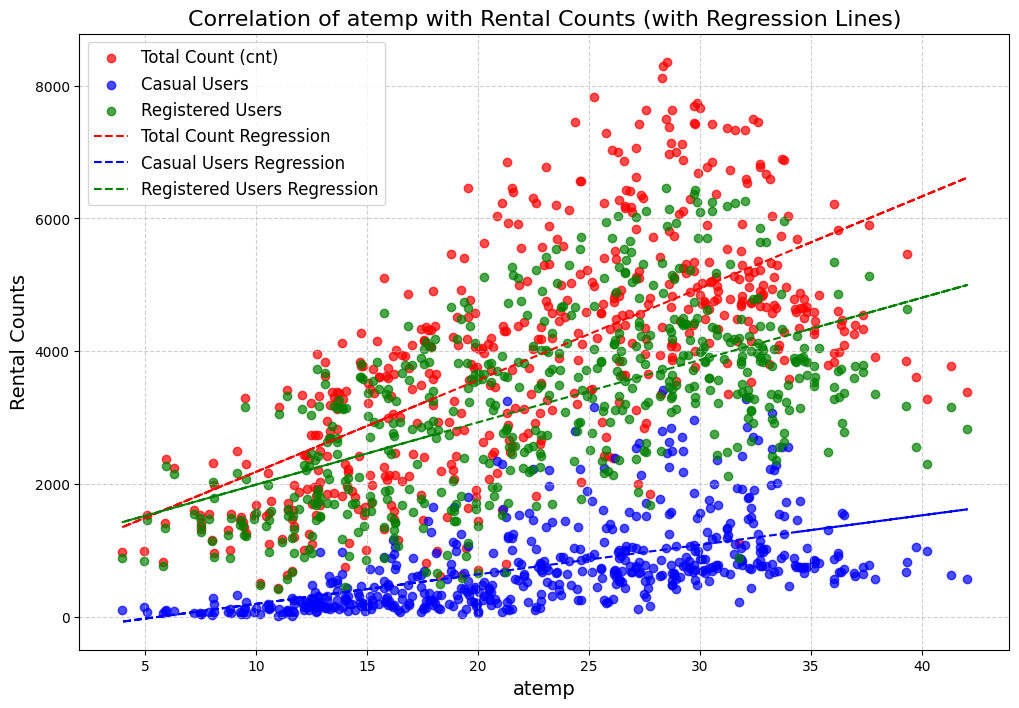

In [67]:
# plot korrelation of new Feature with rental count, registered and casual
import numpy as np

fig, ax = plt.subplots(figsize=(12, 8))  # Slightly larger figure for better visibility

# Scatter plots
ax.scatter(bike_rental['atemp'], bike_rental["cnt"], label="Total Count (cnt)", color="red", alpha=0.7)
ax.scatter(bike_rental['atemp'], bike_rental["casual"], label="Casual Users", color="blue", alpha=0.7)
ax.scatter(bike_rental['atemp'], bike_rental["registered"], label="Registered Users", color="green", alpha=0.7)

# Add regression lines
for column, color, label in zip(["cnt", "casual", "registered"], ["red", "blue", "green"], ["Total Count", "Casual Users", "Registered Users"]):
    # Fit a linear regression model
    coeffs = np.polyfit(bike_rental['atemp'], bike_rental[column], 1)  # Linear regression (degree=1)
    regression_line = np.poly1d(coeffs)  # Generate the regression line
    ax.plot(bike_rental['atemp'], regression_line(bike_rental['atemp']), color=color, linestyle="--", label=f"{label} Regression")

# Add title and axis labels
ax.set_title("Correlation of atemp with Rental Counts (with Regression Lines)", fontsize=16)
ax.set_xlabel("atemp", fontsize=14)
ax.set_ylabel("Rental Counts", fontsize=14)

# Add grid for better readability
ax.grid(True, linestyle="--", alpha=0.6)

# Add legend with improved placement
ax.legend(loc="upper left", fontsize=12)

# Show the plot
plt.show()

Die Korrelation des neuen Features wirkt recht gut, bis man die Korrelation mit atemp oder temp vergleicht und keine Verbesserungen feststellen kann. Traue ~~keiner Statistik~~ keinem Plot den du nicht selbst gefälscht hast. 

Der Korrelationswert mit cnt beträgt 0.54 und ist damit geringer als bei temp, atemp, instant und intday. 

Es ist beim neuen Feature log(atemp/hum) eine lineare Korrelation erkennbar und könnte für das Modelltraining verwendet werden.

## 5. Fehler
season : season (1:springer, 2:summer, 3:fall, 4:winter)
im readme ist die Einteilung der Jahreszeiten anders als im Datensatz => 1: Winter, 2: Frühling...



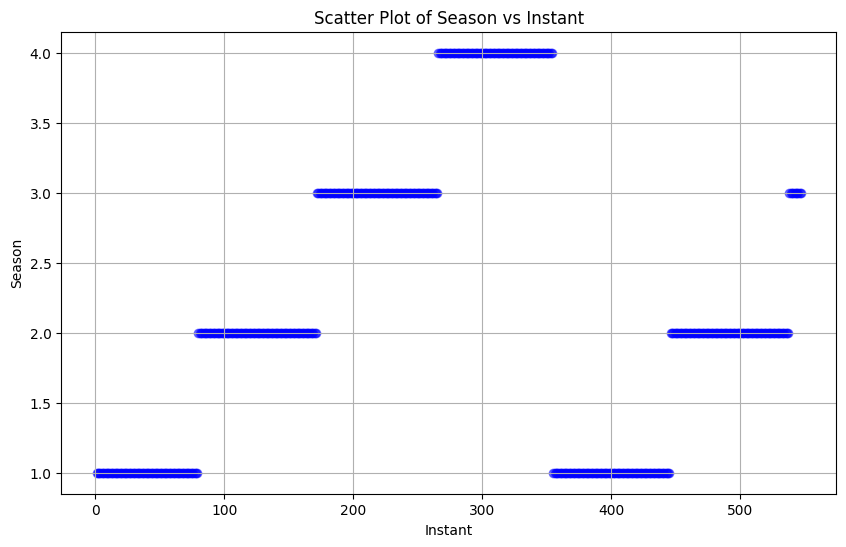

In [82]:
# Scatter plot season vs instant
plt.figure(figsize=(10, 6))
plt.scatter(bike_rental['instant'], bike_rental['season'],  alpha=0.5, color='blue')
plt.title('Scatter Plot of Season vs Instant')
plt.xlabel('Instant')
plt.ylabel('Season')
plt.grid(True)
plt.show()


In [83]:
# Ensure the dataset is sorted by date (if not already sorted)
bike_rental = bike_rental.sort_values(by="dteday")

# Identify rows where the "season" value changes
season_changes = bike_rental[bike_rental["season"] != bike_rental["season"].shift(1)]

# Display the dates and corresponding seasons where the change occurs
print("Dates where 'season' changes:")
print(season_changes[["dteday", "season"]])

Dates where 'season' changes:
         dteday  season
0    2011-01-01       1
79   2011-03-21       2
171  2011-06-21       3
265  2011-09-23       4
354  2011-12-21       1
445  2012-03-21       2
537  2012-06-21       3


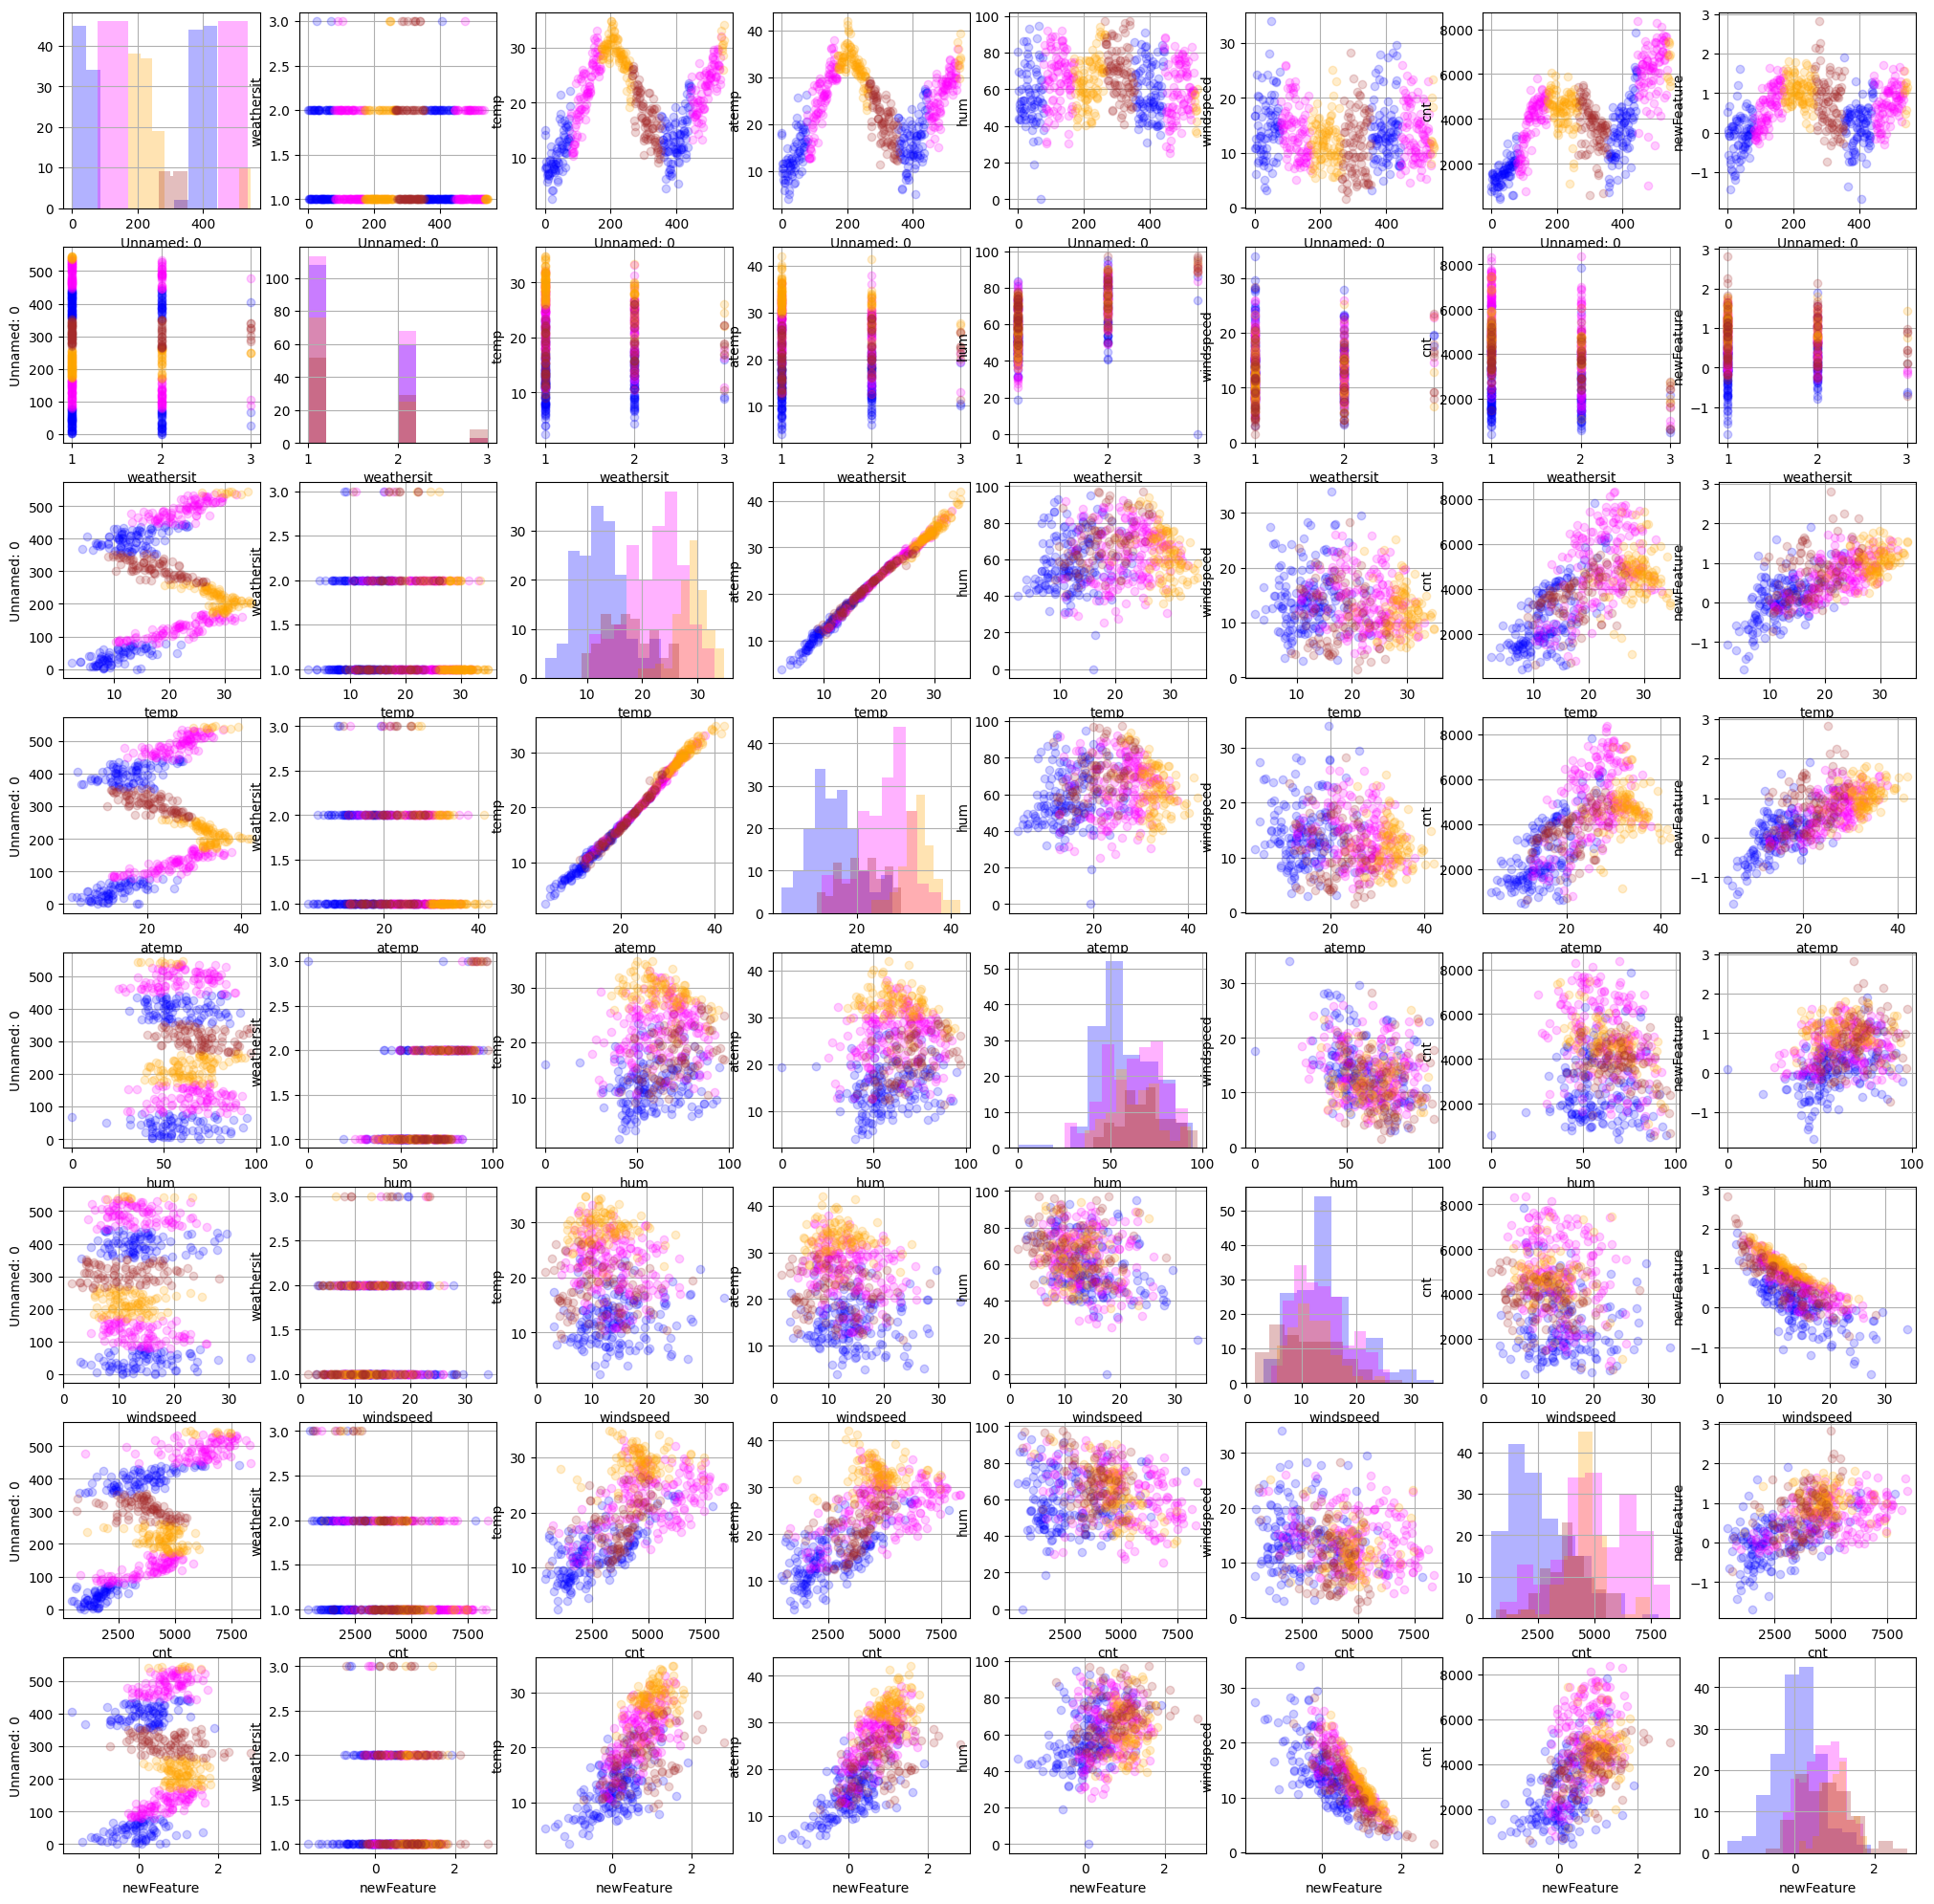

In [ ]:
# Farben für Fahreszeiten wurden geändert

no_show_columns=  ['instant','dteday','intday','casual','registered','season','yr','mnth','holiday','weekday','workingday'] # Welche Spalten nicht angezeigt werden sollen
n=len(bike_rental.columns)-len(no_show_columns) # Anzahl der zu zeigenden Zellen
show_columns=list(bike_rental.columns) # Bilde liste mit allen Colomns
for column in no_show_columns:
    show_columns.remove(column) # Wie oben
    
spec_feat='season' # Features nach welchem ich Farblich unterscheiden soll
specials=np.sort(np.unique(bike_rental[spec_feat].values)) # Mache  Liste der verschiedenen Einträge von specials
color_dict={2:'fuchsia', # Dictionary, das die Farben zu den einzelnen Werten codiert (lt Readme: 1 Spring, 2 Summer, 3 Autumn, 4 Winter)
           3:'orange',
           4:'brown',
           1:'blue'}

fig,ax=plt.subplots(n,n,figsize=(25,25))
for i,key in  enumerate(show_columns):
    for j,key2 in enumerate(show_columns):
        if key==key2: # Auf Diagonale
            for spec in specials: # iteriere durch die Werte von Specials 
                cond=(bike_rental[spec_feat]==spec) #erzeuge einen bool'schen Vektor der  True oder False entält, 
                #ob das entsprechende Element in den Daten mit dem iterationselement spec übereinstimmt
                # Mit diesem Vektor [cond] kann dann mit .loc[cond] gefiltert werden, dass er nur die True-Elemente behält
                ax[i][i].hist(bike_rental[key].loc[cond],color=color_dict[spec],alpha=0.3,label=key) # Plotte immer
                #nur die Elemente die True in cond als Wert haben, codiere mit Farbe
                # Verwende als Farbwert den Eintrag im Dictionary color_dict, Verwende als Label denn key und die Season. Joine beide Strings mit einem _ dazwischen
            ax[i][i].set_xlabel(key)
        else: # Off-Diagonale wie oben
            for spec in specials:
                cond=(bike_rental[spec_feat]==spec)
                ax[i][j].plot(bike_rental[key].loc[cond],bike_rental[key2].loc[cond],ls='',marker='o',alpha=0.2,color=color_dict[spec])
            ax[i][j].set_xlabel(key)
            ax[i][j].set_ylabel(key2)

        ax[i][j].grid(True)
